# ブロックチェーンの取引履歴を可視化

In [1]:
from torch_geometric.utils import to_networkx
import networkx as nx
import pandas as pd
# from io import StringIO
import matplotlib.pyplot as plt
from pandas import json_normalize
import json

# 取引履歴csvファイルをDataFrameに読み込み
df = pd.read_csv("output7.csv")
# valueが空欄のtransactionを削除
df = df.dropna(subset=['value'])
# JSONの列をキーごとに別々の列にして別のDataFrameに
df_json = json_normalize(df['value'].apply(lambda x: json.loads(x)))
# 送金元と送金先のペアを抽出
df = df[['from','to']]
# 送金元と送金先のペアに送金額を横結合
df = pd.concat([df[['from','to']], df_json['hex']], axis=1)
# 送金額ゼロのtransactionを削除
df = df[df['hex'] != '0x00']
# 送金額を16進数(str)から10進数(int)に
df['hex'] = df['hex'].apply(int, base=16)
# 列名変更
df = df.rename({'hex': 'weight'}, axis='columns')
df['weight'] = df['weight']/2000000000000000000
# DataFrame表示
df

from  \
0    0x5eFCFBD59316b4317F181A2606e8Cd02529e3DAB   
1    0xd1616585C6260962d3D4E3603541a00d6F4c4636   
2    0x24187317B02Ca90826bA93b2fcd6c0E74203eE43   
3    0xAbA3Dd632092876F6f88EDA527D050A37f781cf9   
4    0x86641296F701139CD8Fe90DE69bE701eE57a5079   
..                                          ...   
915  0x4eAF936c172b5e5511959167e8Ab4f7031113Ca3   
916  0x4fE89fd7a0117ba95c3Fd8de12C9b8ABe06D4f2C   
932  0x79BcE6e5B87D6ef36531336bCf21FF86B79Adfd5   
943  0xC85b44F12Be1235041E251aCa4Fb04AB85af9795   
944  0x0995Fe2E354A7aa99Bc42E958101a999a53C8564   

                                             to        weight  
0    0x27Bc84873c51b0B6c2612918BF2620e543449AA6  2.450000e-01  
1    0x27Bc84873c51b0B6c2612918BF2620e543449AA6  2.450000e-01  
2    0x27Bc84873c51b0B6c2612918BF2620e543449AA6  2.450000e-01  
3    0x27Bc84873c51b0B6c2612918BF2620e543449AA6  2.450000e-01  
4    0x27Bc84873c51b0B6c2612918BF2620e543449AA6  2.450000e-01  
..                                          ...           ...  
915  0x7E28335E19F4cCEe8f493B1a94329Ed04cEE9924  4.750000e-03  
916  0xB9A60416f2dea96C07A9Ab53e35350888D2D67e0  4.591600e-03  
932  0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f  5.000000e-19  
943  0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f  5.000000e-18  
944  0x95fF8D3CE9dcB7455BEB7845143bEA84Fe5C4F6f  5.000000e-19  

[386 rows x 3 columns]

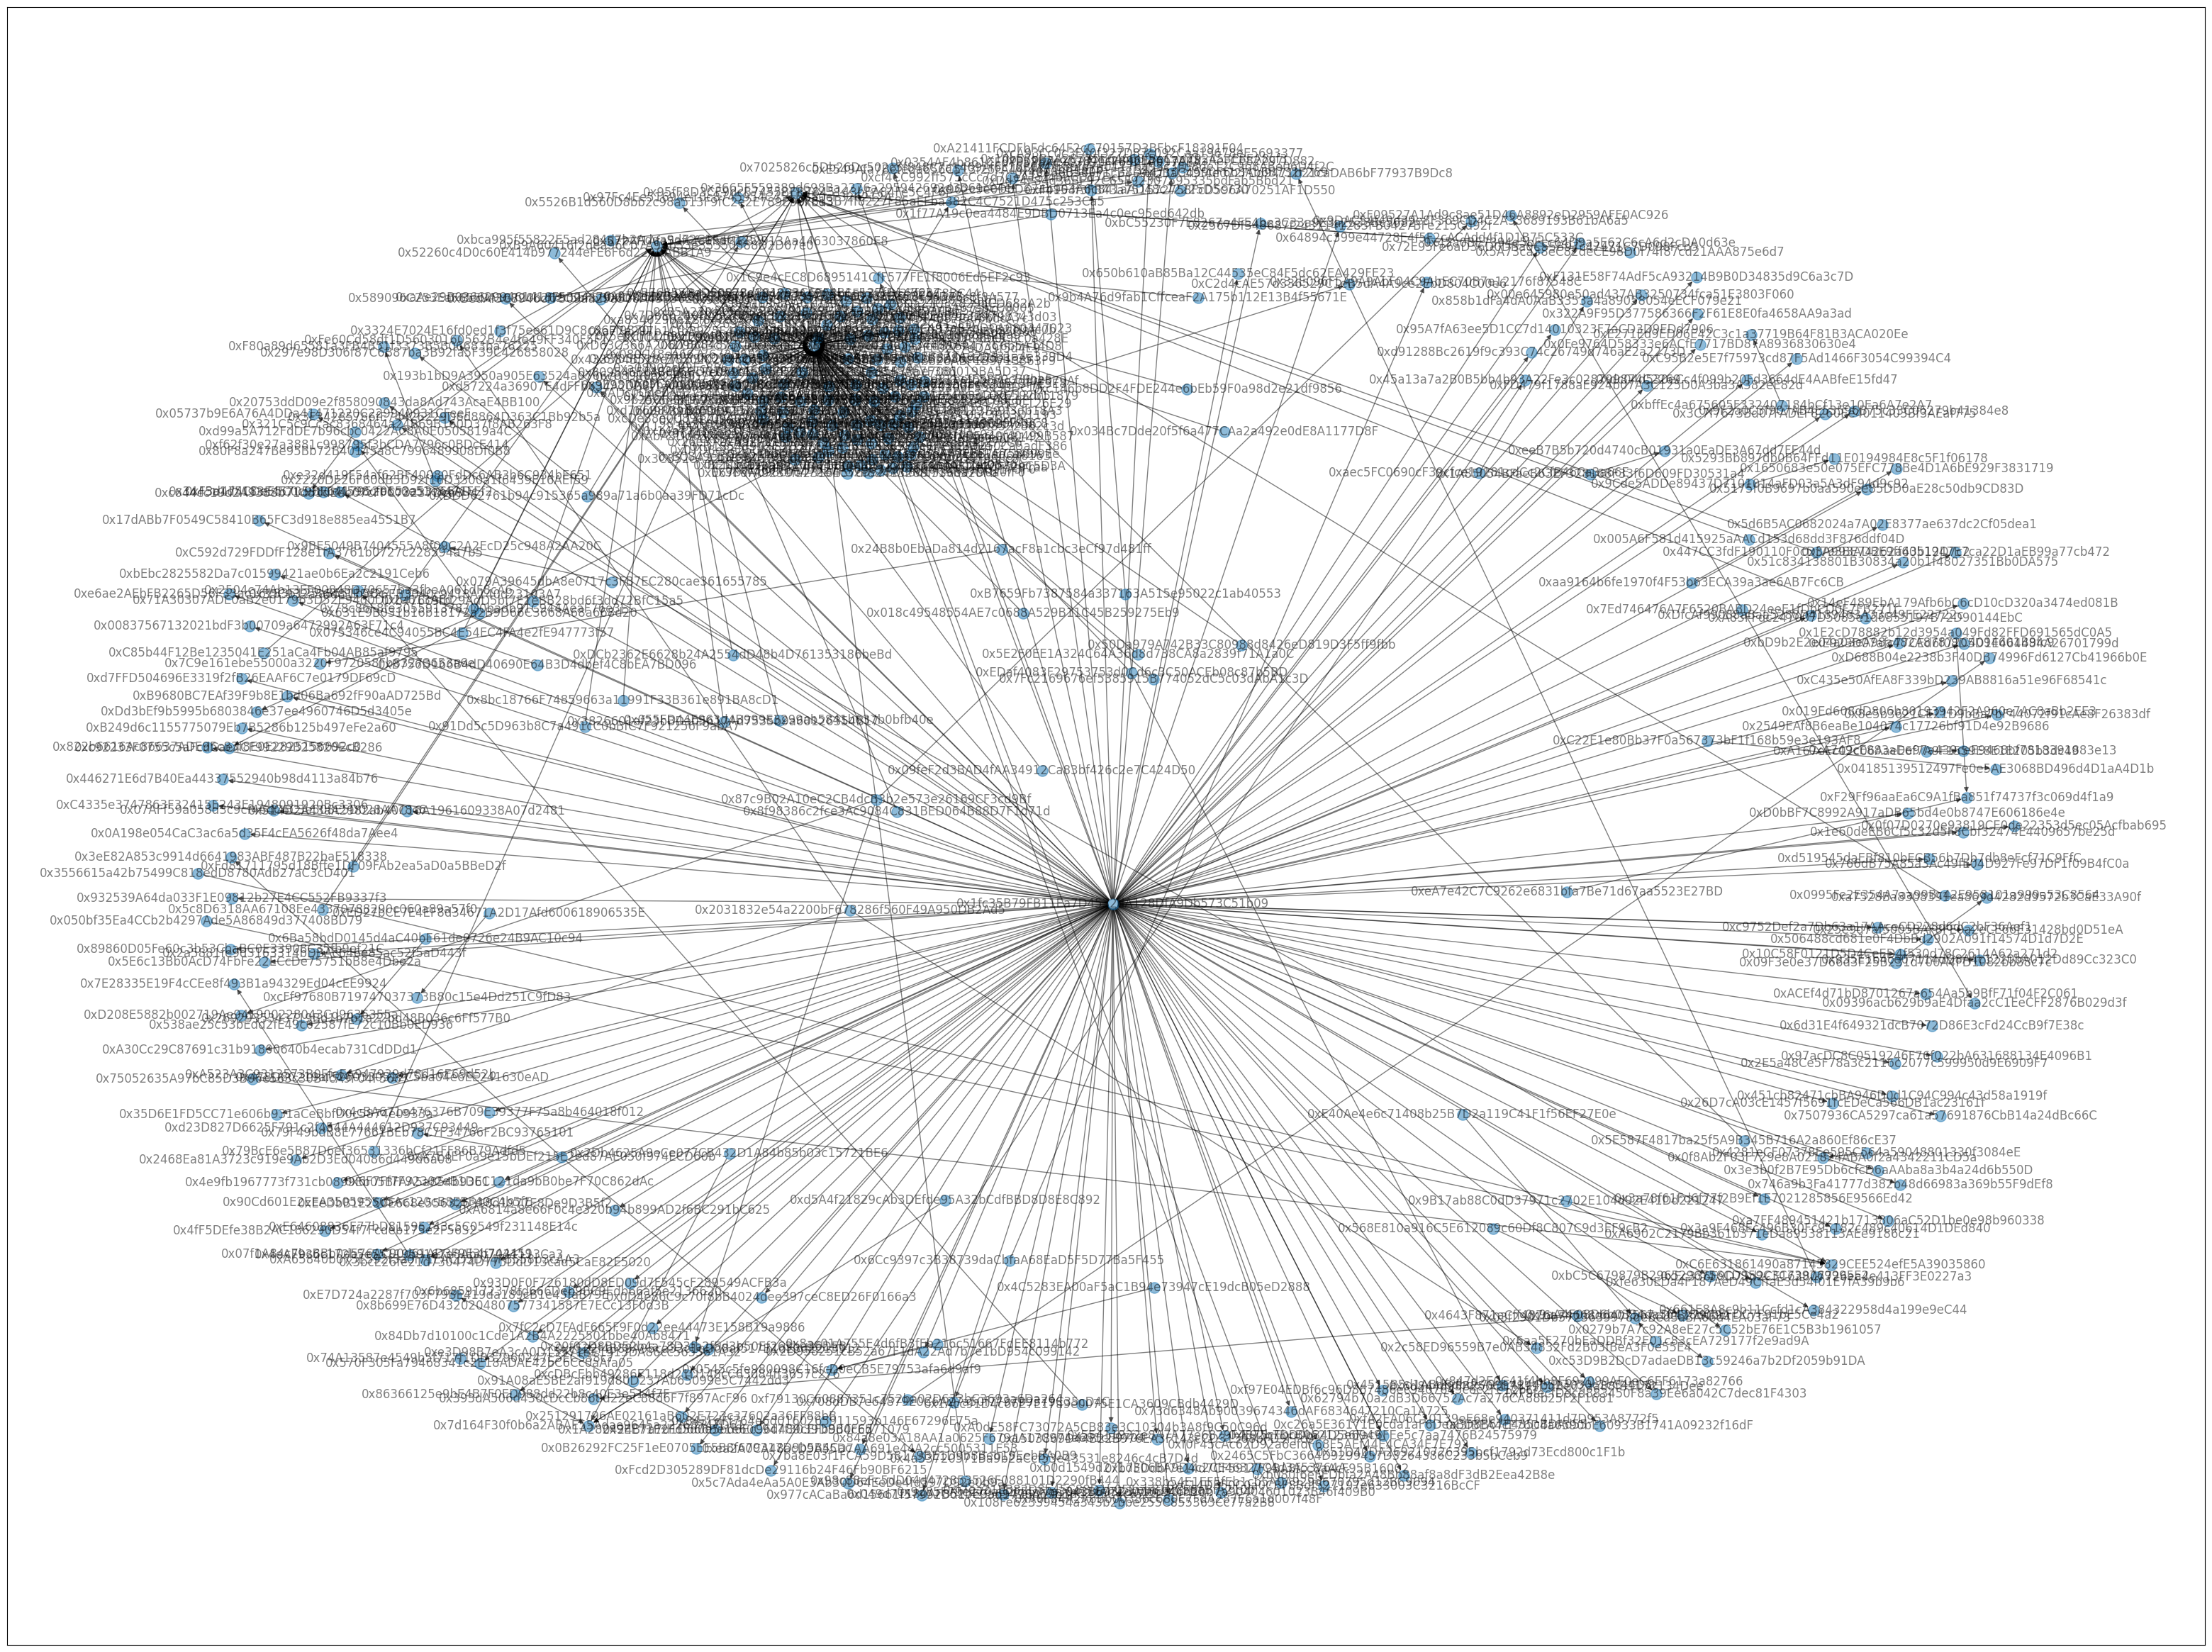

In [2]:
# https://qiita.com/niship2/items/9d7e2b6ab2ca1be18eaf
import matplotlib.pyplot as plt

# 可視化画面のサイズを設定
plt.figure(figsize=(40, 30))
# 可視化ライブラリの仕様に列名を変更
df.columns = ['source','target','weight']
# 可視化ライブラリの仕様にデータ型を変更
df.loc[:,'source'] = df.loc[:, 'source'].astype(str)
df.loc[:,'target'] = df.loc[:, 'target'].astype(str)
df.loc[:,'weight'] = df.loc[:, 'weight'].astype(str)
# 可視化ライブラリにエッジのリストとしてDataFrameを渡す
# G = nx.from_pandas_edgelist(df,create_using=nx.DiGraph())
G = nx.from_pandas_edgelist(df, 'source','target', 'weight',create_using=nx.DiGraph())
# 可視化の設定を渡して描画
nx.draw_networkx(G,
        alpha=0.5,
        with_labels = True,
        node_size=120) #修正済み
# 画像表示
plt.show()

In [3]:
from pyvis.network import Network
pyvis_G = Network(directed=True)
pyvis_G.from_nx(G)
pyvis_G.toggle_physics(True)  #修正済み，enable→toggle　html上でレイアウト動かしたくない場合false
# pyvis_G.toggle_physics('false')
pyvis_G.show_buttons()
pyvis_G.show("mygraph.html", notebook=False)

mygraph.html
